In [1]:
import matplotlib.pyplot as plt
import numpy as np
from custom_sepsis import *

In [2]:
env = TrModelEnv(transition_model())
# dqn_TRMod_training = train_dqn(env, 100_000, "Transition_Model_100K")


In [ ]:
# dqn_TRMod_training.evaluate_policy(100000)

-0.85783

## add history

In [14]:
dqn_training = Training.load("data/trainings/DQN-Test_object.pkl")
dqn_policy = dqn_training.get_policy()
dqn_training.evaluate_policy(10000)

-0.3705

In [3]:
# use a reasonable policy for history
history = [run_episode(random_policy()) for _ in range(100)]

In [ ]:
hr_counts = init_hr_counts()
bp_counts = init_bp_counts()
o2_counts = init_o2_counts()
glu_counts = init_glu_counts()
for episode in history:
    state_counts = update_factored_counts(episode, hr_counts, bp_counts, o2_counts, glu_counts)

In [ ]:
env = TrModelEnv(transition_model(hr_counts=hr_counts, bp_counts=bp_counts, o2_counts=o2_counts, glu_counts=glu_counts))
trmod_hist = train_dqn(env=env, nr_iter=0, name="Transition_Model_100_History_10000_train")
# trmod_hist = Training.load("data/trainings/DQN-Transition_Model_History_of_100000_object.pkl")

In [19]:
trmod_hist.evaluate_policy(10000)

-1.1604

In [20]:
dqn_training.evaluate_policy(10000)

-0.4194

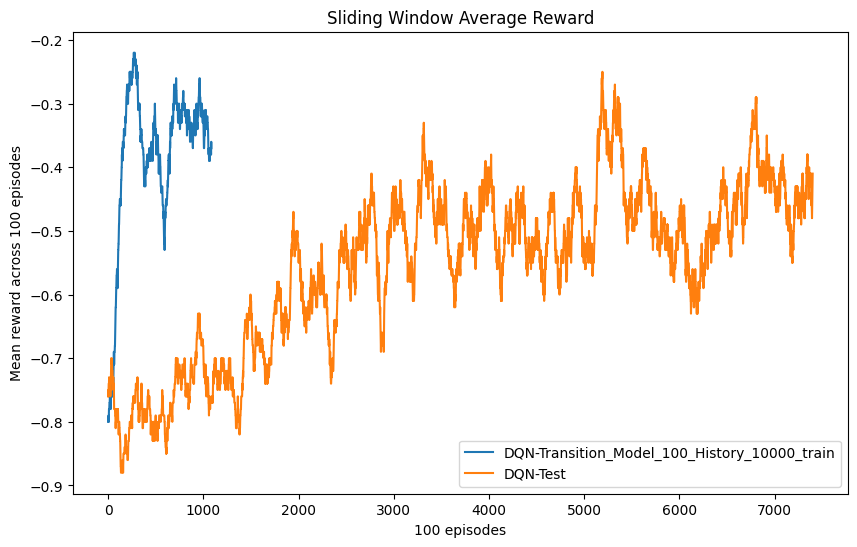

In [17]:
plot_rewards([trmod_hist, dqn_training], 7500, 100)

In [13]:
# compare with value iteration
V = np.zeros(len(STATES))
policy, values = matrix_value_iteration(V, transition_model(state_counts))

In [14]:
evaluate_policy(policy, 10000)


-2.0415